# NeqSim excercise in thermodynamics 

In [1]:
import neqsim
from neqsim.thermo.thermoTools import *

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Calculation of boiling point of pure components.
Calculate the boiling point temperature of pure methane, propane and n-heptane at 1 atm. 
Draw the boiling point temperatrure line of the pure components between 1 atm. and 10 bar.

methane buble point temperature  -161.14414719123826  at pressure  1.01325
methane entalpy of vaporization  (404.8255398402311, ' kJ/kg')


Text(0, 0.5, 'Pressure [bara]')

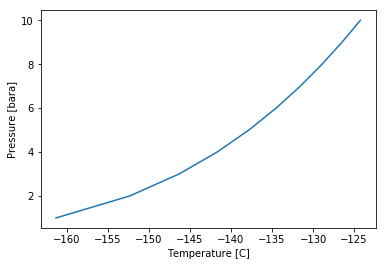

In [2]:
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 1.0) #adding 1 mole methane to the fluid
fluid1.setTemperature(111.0) # setting an initial temperature of -160 deg C
fluid1.setPressure(1.01325)#
bubt(fluid1)
print('methane buble point temperature ', fluid1.getTemperature('C'), " at pressure ", fluid1.getPressure('bara'))
print('methane entalpy of vaporization ', (fluid1.getPhase('gas').getEnthalpy('kJ/kg')-fluid1.getPhase('oil').getEnthalpy('kJ/kg'), ' kJ/kg'))

def bubleP(pressure):
    fluid1.setPressure(pressure)
    bubt(fluid1)
    return fluid1.getTemperature('C')

pressure = np.arange(1.0, 11.0, 1.0)
temperature = [bubleP(P) for P in pressure]

plt.plot(temperature, pressure)
plt.xlabel('Temperature [C]')
plt.ylabel('Pressure [bara]')

## Calculation of heat of vapourization of pure components.
Calculate the heat of vapourization at 1 atm for methane. Draw the heat of vapourization line  of methane between 1 atm. and 10 bar.

methane entalpy of vapourization  (524.1675011225673, ' kJ/kg')


Text(0, 0.5, 'Enthalpy of vaporization [kJ/kg]')

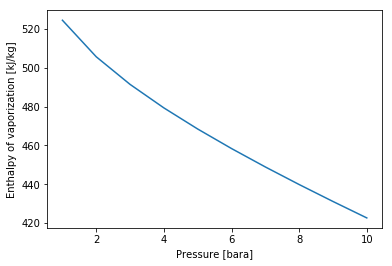

In [4]:
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 1.0) #adding 1 mole methane to the fluid
fluid1.setTemperature(111.0) # setting an initial temperature of -160 deg C
fluid1.setPressure(1.01325)#
bubt(fluid1)
fluid1.init(3) #initializes/calculates all thermodynamic properties of the fluid (including enthalpy)
print('methane entalpy of vapourization ', (fluid1.getPhase('gas').getEnthalpy('kJ/kg')-fluid1.getPhase('oil').getEnthalpy('kJ/kg'), ' kJ/kg'))

def enthalp(pressure):
    fluid1.setPressure(pressure)
    bubt(fluid1)
    fluid1.init(3) 
    return (fluid1.getPhase('gas').getEnthalpy('kJ/kg')-fluid1.getPhase('oil').getEnthalpy('kJ/kg'))

pressure = np.arange(1.0, 11.0, 1.0)
entha = [enthalp(P) for P in pressure]

plt.plot(pressure, entha)
plt.xlabel('Pressure [bara]')
plt.ylabel('Enthalpy of vaporization [kJ/kg]')

## Calculation of boiling point of a binary mixture. 
Calculate the boiling point temperature of a propane and n-pentane mxture (50/50 mol%) at 1 atm. Draw the boiling point temperatrure line of the pure components between 1 atm. and 10 bar.

mixture buble point temperature  -25.628426480557636  at pressure  1.01325
mixture entalpy of vaporization  (281.996938618062, ' kJ/kg')


Text(0, 0.5, 'Pressure [bara]')

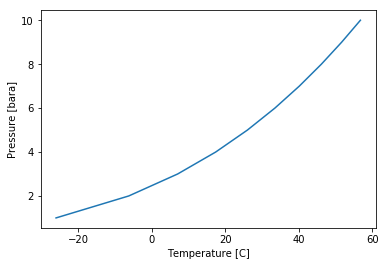

In [5]:
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('propane', 1.0) #adding 1 mole propane to the fluid
fluid1.addComponent('n-pentane', 1.0) #adding 1 mole n-pentane to the fluid
fluid1.setMixingRule('classic') # setting the mixing rule using a constant binary interaction parameter (kij)
fluid1.setTemperature(250.0) # setting an initial temperature in Kelvin
fluid1.setPressure(1.01325)# setting pressure of the fluid in bara
bubt(fluid1)
print('mixture buble point temperature ', fluid1.getTemperature('C'), " at pressure ", fluid1.getPressure('bara'))
print('mixture entalpy of vaporization ', (fluid1.getPhase('gas').getEnthalpy('kJ/kg')-fluid1.getPhase('oil').getEnthalpy('kJ/kg'), ' kJ/kg'))

def bubleP(pressure):
    fluid1.setPressure(pressure)
    bubt(fluid1)
    return fluid1.getTemperature('C')

pressure = np.arange(1.0, 11.0, 1.0)
temperature = [bubleP(P) for P in pressure]

plt.plot(temperature, pressure)
plt.xlabel('Temperature [C]')
plt.ylabel('Pressure [bara]')

Text(0, 0.5, 'Pressure [bara]')

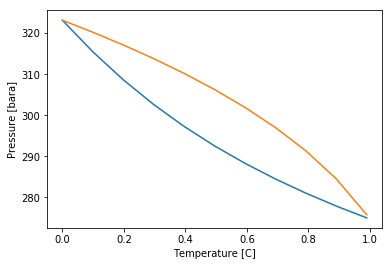

In [6]:
bubtemp = []
dewtemp = []
x = []
y = []
x2 = []
y2 = []
comp1 = 'propane'
comp2 = 'n-butane'

fluid1 = fluid('srk')
addComponent(fluid1, comp1,0.000001)
addComponent(fluid1, comp2,1.01)
fluid1.setMixingRule('classic')
fluid1.setTemperature(200.0)
fluid1.setPressure(5.0)
try:
    for temp in range(0,11):
        bubtemp.append(bubt(fluid1))
        dewtemp.append(dewt(fluid1))
        fluid1.init(0)
        x.append(fluid1.getPhase(0).getComponent(0).getz())
        fluid1.addComponent(comp2, -0.1)
        fluid1.addComponent(comp1, 0.1)
except:
        print('no dewt found')

plt.plot(x, bubtemp, label='bubT')
plt.plot(x, dewtemp, label="dewT")
plt.xlabel('Temperature [C]')
plt.ylabel('Pressure [bara]')

## Calculation of maximum gas velocty in separator based on Souders-Brown equation
A gas mixture of 90 mol% methane and 10 mol% n-heptane is being separated in a gas scruber operating at 55 bara and 27 °C. 4

1. Calculate the maximum gas flow rate in a separator (K-value = 0.1)

2. Set up a simple stream and separator process. Set the diameter of the gas scruber to 0.8 meter. What is the K-value of the separator?

3. What is the liquid rate leving the bottom of the scrubber (in unit m3/hr)?

In [7]:
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 0.9, 'MSm3/day') #adding 1 mole propane to the fluid
fluid1.addComponent('n-heptane', 0.1, 'MSm3/day') #adding 1 mole n-pentane to the fluid
fluid1.setMixingRule('classic') # setting the mixing rule using a constant binary interaction parameter (kij)
fluid1.setTemperature(27.5, 'C')# setting an initial temperature in Kelvin
fluid1.setPressure(55.0, 'bara')# setting pressure of the fluid in bara

TPflash(fluid1)
fluid1.initPhysicalProperties()

interfacialTension = fluid1.getInterfacialTension('gas', 'oil')
gasDensity = fluid1.getPhase('gas').getDensity('kg/m3')
oilDensity = fluid1.getPhase('oil').getDensity('kg/m3')
print('Interfacial tension (mN/m) ', interfacialTension*1e3, ' gas density (kg/m3) ',gasDensity,' oil density (kg/m3) ',oilDensity)
Kfactor = 0.1

Vmax = Kfactor * math.sqrt((oilDensity-gasDensity)/gasDensity)
print('1. The maximum gas velocity in the separator based on the Souders-Brown equation is ', Vmax, ' m/sec')


#setting up a simple separation process for the fluid
processEquipment = neqsim.processSimulation.processEquipment
feedStream1 = processEquipment.stream.Stream("Feed stream", fluid1)
gasScrubber = processEquipment.separator.GasScrubberSimple("Gas scrubber", feedStream1)
gasScrubber.setInternalDiameter(0.8)
operations =  neqsim.processSimulation.processSystem.ProcessSystem()
operations.add(feedStream1)
operations.add(gasScrubber)
operations.run()
print('2. The gas load factor K for a scrubber with internal diameter of 0.5 meter is ', gasScrubber.getGasLoadFactor(), ' m/sec')

print('3. Liquid rate from scrubber (m3/hr) ', gasScrubber.getLiquidOutStream().getThermoSystem().getFlowRate('m3/hr'))

Interfacial tension (mN/m)  11.814405117075122  gas density (kg/m3)  39.63422855208507  oil density (kg/m3)  639.3699749662647
1. The maximum gas velocity in the separator based on the Souders-Brown equation is  0.38899566617577613  m/sec
2. The gas load factor K for a scrubber with internal diameter of 0.5 meter is  0.09039273591122822  m/sec
3. Liquid rate from scrubber (m3/hr)  31.99615029834089


thermo method:  cpa  not defined . Continue with default method SRK-EOS


Text(0, 0.5, 'Density [kg/m3]')

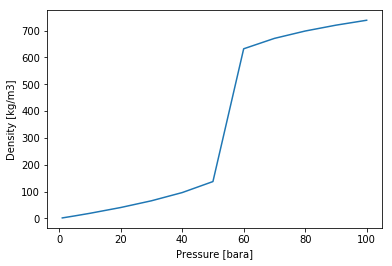

In [8]:
fluid1 = fluid('cpa')
fluid1.addComponent('CO2',1.0)
fluid1.setTemperature(20.5, 'C')

pressures = [1.0, 5.0, 10.0, 20.0,30.0, 40.0, 50.0,60.0,70.0, 80.0,90.0,100.0];
density = []

for P in pressures:
    fluid1.setPressure(P)
    TPflash(fluid1)
    density.append(fluid1.getDensity())

plt.plot(pressures, density, label='density')
plt.xlabel('Pressure [bara]')
plt.ylabel('Density [kg/m3]')

## Calculation of compressor power
A gas mixture of 90 mol% methane and 10 mol% ethane is compressed from 23°C and 25 bara to 50 bara. THe adibatic efficincy of the compressor is 90%. The gas flow rate is 1 MSm^3/day.

1. Calculate compressor power and outlet temperature by estimating enthalpy and entropy of the fluid
2. Repeat the calculation using a compressor unit operation from neqsim processTools

In [9]:
adibaticEfficiency = 0.9

fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 90.0) #adding 1 mole methane to the fluid
fluid1.addComponent('ethane', 10.0) #adding 1 mole methane to the fluid
fluid1.setTemperature(23.0, 'C') # setting an initial temperature of -160 deg C
fluid1.setPressure(25.0, 'bara')#
fluid1.setTotalFlowRate(1.0, 'MSm3/day')
TPflash(fluid1)
fluid1.init(3)# need to call init 3 the read entropy/enthalpy

inletEntropy = fluid1.getEntropy()
inletEnthalpy = fluid1.getEnthalpy('J')

fluid1.setPressure(50.0)
PSflash(fluid1, inletEntropy)

outAdiabaticEnthalpy = fluid1.getEnthalpy('J')
outRealEnthalpy = (outAdiabaticEnthalpy-inletEnthalpy)/adibaticEfficiency + inletEnthalpy
PHflash(fluid1, outRealEnthalpy)

print('1.')
print('Compressor power ', (outRealEnthalpy-inletEnthalpy)/1.0e3, 'kW')
print('Real outlet temperature ', fluid1.getTemperature('C'), ' C')


1.
Compressor power  954.4137091826815 kW
Real outlet temperature  78.73166520253483  C


In [10]:
from neqsim.process.processTools import *

fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 90.0) #adding 1 mole methane to the fluid
fluid1.addComponent('ethane', 10.0) #adding 1 mole methane to the fluid
fluid1.setTemperature(23.0, 'C') # setting an initial temperature of -160 deg C
fluid1.setPressure(25.0, 'bara')#
fluid1.setTotalFlowRate(1.0, 'MSm3/day')
TPflash(fluid1)


clearProcess()
feedStream = stream(fluid1,"feed fluid")
compressor1 = compressor(feedStream, 50.0)
compressor1.setIsentropicEfficiency(adibaticEfficiency)
runProcess()

print('2.')
print('Compressor power ', compressor1.getPower()/1.0e3, 'kW')
print('Compressor power ', compressor1.getThermoSystem().getTemperature('C'), 'C')

2.
Compressor power  954.4137091826815 kW
Compressor power  78.73166520253483 C


## Calculation of a shell and tube heat exchanger
A 1 MSm^3/day methane stream at 50 bara and 40 °C is going to be cooled to 20 °C. THe cooling medium will be water at atmosperic pressure entering at 10°C.

In [11]:
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 90.0) #adding 1 mole methane to the fluid
fluid1.setTemperature(40.0, 'C') # setting an initial temperature of -160 deg C
fluid1.setPressure(50.0, 'bara')#
fluid1.setTotalFlowRate(1.0, 'MSm3/day')
TPflash(fluid1)

water = fluid('srk') #create a fluid using the SRK-EoS
water.addComponent('MEG', 10.0)
water.addComponent('water', 900.0) #adding 1 mole methane to the fluid
water.setTemperature(10.0, 'C') # setting an initial temperature of -160 deg C
water.setPressure(1.01325, 'bara')
TPflash(water)

clearProcess()
feedStream = stream(fluid1,"feed fluid")
heatExchanger1 = heater(feedStream)
heatExchanger1.setOutTemperature(273.15+20.0)
runProcess()

Tinn = water.getTemperature()
print('heater duty ', heatExchanger1.getEnergyInput()," W")

PHflash(water, (water.getEnthalpy()-heatExchanger1.getEnergyInput()))
Tout = water.getTemperature()
print('water out temperature ', water.getTemperature('C')," C")

Cpbased = water.getCp()*(Tout-Tinn)
print("cp based estimate ", Cpbased)

LMTD = 10.0

UA =  -heatExchanger1.getEnergyInput()/LMTD

print('Estimated UA ', UA)

heater duty  -406952.8224143858  W
water out temperature  15.09685524590003  C
cp based estimate  406742.3657782809
Estimated UA  40695.28224143858


In [9]:
from neqsim.standards.standardTools import *

fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 90.0) #adding 1 mole methane to the fluid
fluid1.addComponent('ethane', 1.0) #adding 1 mole methane to the fluid
fluid1.setTemperature(23.0, 'C') # setting an initial temperature of -160 deg C
fluid1.setPressure(25.0, 'bara')#
TPflash(fluid1)
standard = ISO6976(fluid1)
GCV = standard.getValue("GCV")
WI = standard.getValue("SuperiorWobbeIndex")


print('WI ', WI, ' GCV ', GCV) #need to have database table for ISO6976

WI  nan  GCV  0.0


## Calculation of GCV and WI
Calculate the WI and GVC of a 90/10 mol% methane ethane gas mixture

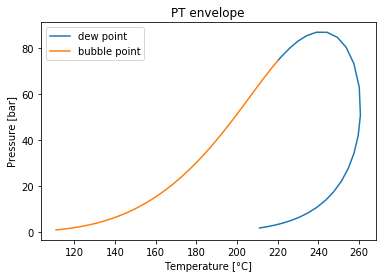

In [12]:
thermoSystem = neqsim.thermo.system.SystemSrkEos(280.0,10.0)
thermoSystem.addComponent("nitrogen", 1.0)
thermoSystem.addComponent("methane", 70.0)
thermoSystem.addComponent("ethane", 4.0)
thermoSystem.addComponent("propane", 2.0)
thermoSystem.addComponent("i-butane", 1.0)
thermoSystem.addComponent("n-butane", 1.0)

thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(thermoSystem)
thermoOps.calcPTphaseEnvelope()

plt.plot(list(thermoOps.getOperation().get("dewT")),list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot(list(thermoOps.getOperation().get("bubT")),list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('PT envelope')
plt.xlabel('Temperature [\u00B0C]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()

In [13]:
thermoSystem = neqsim.thermo.system.SystemSrkEos(280.0,10.0)
thermoSystem.addComponent("nitrogen", 1.0)
thermoSystem.addComponent("methane", 70.0)
thermoSystem.addComponent("ethane", 4.0)
thermoSystem.addComponent("propane", 2.0)
thermoSystem.addComponent("i-butane", 1.0)
thermoSystem.addComponent("n-butane", 1.0)

In [14]:
adibaticEfficiency = 0.9

fluid1 = fluid('srk') 
fluid1.addComponent('methane', 90.0)
fluid1.setTemperature(23.0, 'C') 
fluid1.setPressure(50.0, 'bara')
TPflash(fluid1)
fluid1.init(3)
fluid1.display()


entalpi1 = fluid1.getEnthalpy('J/kg')
fluid1.setPressure(100.0,'bara')
TPflash(fluid1)
fluid1.init(3)
entalpi2 = fluid1.getEnthalpy('J/kg')
print(entalpi1, ' ', entalpi2)
print('enthalpy change ', (entalpi2-entalpi1), ' J/kg')


-2643.165204582796   -54718.29331940451
enthalpy change  -52075.12811482172  J/kg


In [15]:
adibaticEfficiency =0.9
from neqsim.process.processTools import *
fluid1 = fluid('srk') 
fluid1.addComponent('methane', 90.0)
fluid1.setTemperature(23.0, 'C') 
fluid1.setPressure(50.0, 'bara')
TPflash(fluid1)
fluid1.init(3)

clearProcess()
feedStream = stream(fluid1,"feed fluid")
compressor1 = compressor(feedStream, 120.0)
compressor1.setIsentropicEfficiency(adibaticEfficiency)
runProcess()

print(compressor1.getOutStream().getTemperature()-273.15)
print('power ', compressor1.getPower())

98.74399379178868
power  224910.81390310114


#Calculation of a phase envelope

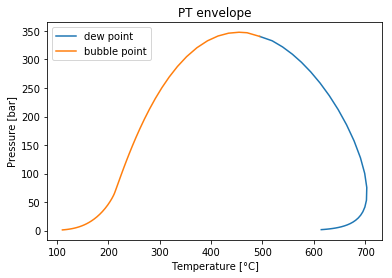

In [18]:
nitrogen = 0.5 #@param {type:"number"}
CO2 = 2.5 #@param {type:"number"}
methane = 40.0  #@param {type:"number"}
ethane = 10.0  #@param {type:"number"}
propane =  5.0 #@param {type:"number"}
ibutane =  1.25 #@param {type:"number"}
nbutane =  1.25 #@param {type:"number"}
ipentane =  0.25 #@param {type:"number"}
npentane = 0.25 #@param {type:"number"}
nhexane =  0.125 #@param {type:"number"}
C7 =  10.225 #@param {type:"number"}
C7Molarmass =  210.0 #@param {type:"number"}
C7Density =  810.2 #@param {type:"number"}

fluid1 = fluid('srk')
fluid1.addComponent("nitrogen", nitrogen)
fluid1.addComponent("CO2", CO2)
fluid1.addComponent("methane", methane)
fluid1.addComponent("ethane", ethane)
fluid1.addComponent("propane", propane)
fluid1.addComponent("i-butane", ibutane)
fluid1.addComponent("n-butane", nbutane)
fluid1.addComponent("i-pentane", ipentane)
fluid1.addComponent("n-pentane", npentane)
fluid1.addComponent("n-hexane", nhexane)
fluid1.addPlusFraction("C7", C7, C7Molarmass/1000.0, C7Density/1000.0)
fluid1.getCharacterization().characterisePlusFraction()
fluid1.setMixingRule('classic')

thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(fluid1)
thermoOps.calcPTphaseEnvelope()

plt.plot(list(thermoOps.getOperation().get("dewT")),list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot(list(thermoOps.getOperation().get("bubT")),list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('PT envelope')
plt.xlabel('Temperature [\u00B0C]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()
fluid1.display()